In [58]:
import pandas as pd
import matplotlib.pyplot as plt

## Cálculo de carga para cada nodo (+/-)

In [59]:
df_prod = pd.read_csv('dataset/mean_production.csv')
df_cons = pd.read_csv('results/consum_25.csv') #es el único que está bien, con datos y con columna h

In [60]:
df_prod.head()

,solar,iid,datetime,h
0,0.0,0,2010-07-01,0.0
1,0.0,0,2010-07-01,1.0
2,0.0,0,2010-07-01,2.0
3,0.0,0,2010-07-01,3.0
4,0.0,0,2010-07-01,4.0


In [62]:
df_cons.head()

,Pavg,iid,datetime,h
0,2524.484150,25,2013-04-06,0.0
1,300.692617,25,2013-04-06,1.0
2,232.383467,25,2013-04-06,2.0
3,220.126917,25,2013-04-06,3.0
4,217.004100,25,2013-04-06,4.0


In [63]:
df_merged = pd.merge(df_prod, df_cons, on=['datetime', 'h'], how='inner')
df_merged.head()

,solar,iid_x,datetime,h,Pavg,iid_y
0,NaN,0,2010-10-31,NaN,NaN,25
1,NaN,0,2010-10-31,NaN,NaN,25
2,NaN,0,2010-10-31,NaN,NaN,25
3,NaN,0,2010-10-31,NaN,NaN,25
4,NaN,0,2010-10-31,NaN,NaN,25


In [64]:
df_merged = df_merged.dropna() 
df_merged.head()

,solar,iid_x,datetime,h,Pavg,iid_y
192,0.0,0,2012-08-01,0.0,164.495763,25
193,0.0,0,2012-08-01,1.0,129.631658,25
194,0.0,0,2012-08-01,2.0,125.548683,25
195,0.0,0,2012-08-01,3.0,145.556332,25
196,0.0,0,2012-08-01,4.0,149.209872,25


In [67]:
df_merged['dif'] = (df_merged['solar']*1000/50) - df_merged['Pavg']  
max_solar = df_merged[df_merged['dif'] < -3000]
max_solar.head()

,solar,iid_x,datetime,h,Pavg,iid_y,dif
278,13.6900,0,2012-08-04,14.0,3528.191917,25,-3254.391917
307,3.4850,0,2012-08-05,19.0,3330.805783,25,-3261.105783
400,12.4150,0,2012-08-12,15.0,3958.356000,25,-3710.056000
613,2.7785,0,2012-08-21,19.0,3797.490450,25,-3741.920450
949,0.2025,0,2012-09-04,20.0,3620.867833,25,-3616.817833


### Comparación de los datos de producción (Sustdata) con los de referencia (personalizados)

In [ ]:
df_ref = pd.read_csv('dataset/pvwatts_hourly.csv')
df_ref.head()

Text(0, 0.5, 'Power (+/-)')

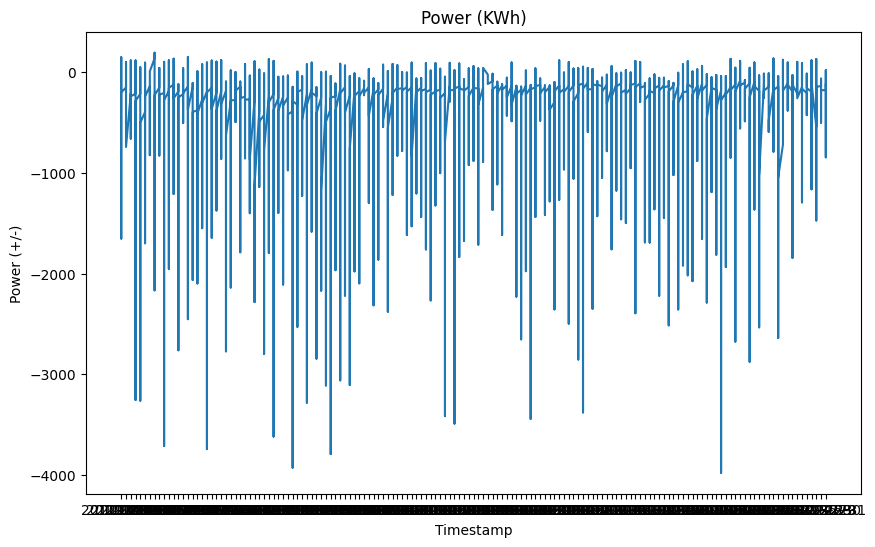

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(df_merged["datetime"], df_merged["dif"], linestyle="-")
plt.title(f"Power (KWh)")
plt.xlabel("Timestamp")
plt.ylabel("Power (+/-)")